### 주성분 분석(PCA)
- wine data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()

In [6]:
# 표준정규분포로 데이터 전환
from sklearn.preprocessing import StandardScaler
wine_std = StandardScaler().fit_transform(wine.data)
wine_std[:2]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152]])

In [9]:
# 차원축소 
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_std)            # 학습 아닌 전환!]
wine_pca[:2]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289]])

In [10]:
# 설명력 
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

In [12]:
# 한 번 더 차원 축소 
pca2 = PCA(n_components=4)
wine_pca2 = pca2.fit_transform(wine_std)
pca2.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 ])

In [13]:
# 차원축소 분류비교 

# pca 전
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, stratify=wine.target, random_state=2021
)
rf = RandomForestClassifier(random_state=2021)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

1.0

In [14]:
#  pca 후 

X_train, X_test, y_train, y_test = train_test_split(
    wine_std, wine.target, stratify=wine.target, random_state=2021
)
rf = RandomForestClassifier(random_state=2021)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)


1.0

In [15]:
# pca 전후 데이터 시각화 비교 

In [23]:
# 오리지널  
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
df.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0


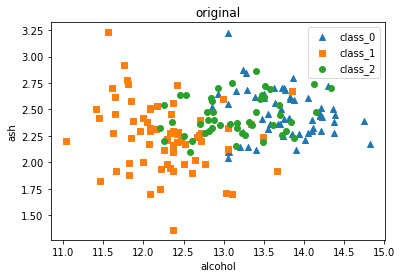

In [25]:
markers = ['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data = df[df.target == i]['alcohol']
    y_axis_data = df[df.target == i]['ash']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label=wine.target_names[i])
plt.legend()
plt.title('original')
plt.xlabel('alcohol')
plt.ylabel('ash')
plt.show()

In [29]:
# pca 비교 
df['PC1'] = wine_pca[:,0]
df['PC2'] = wine_pca[:,1]
df.head(3)



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,PC1,PC2
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,3.316751,-1.443463
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,2.209465,0.333393
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,2.516740,-1.031151


No handles with labels found to put in legend.


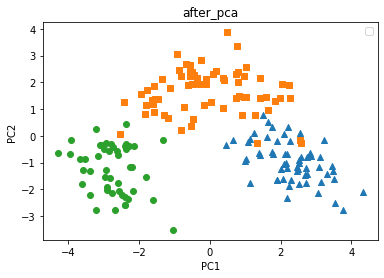

In [30]:
for i, marker in enumerate(markers):
    x_axis_data=df[df.target == i]['PC1']
    y_axis_data=df[df.target == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker = marker)
plt.legend()
plt.title('after_pca')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_wine
wine = load_wine()

In [10]:
from sklearn.preprocessing import StandardScaler
wine_std = StandardScaler().fit_transform(wine.data)

In [11]:
wine_std[:3]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818]])

- Scikit-Learn으로 차원축소

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)       # 시각화 위해 2차원 

In [13]:
wine_pca = pca.fit_transform(wine_std)            # 변환 메소드 
wine_pca[:5]      

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082]])

In [14]:
pca.explained_variance_ratio_ 

array([0.36198848, 0.1920749 ])

In [22]:
pca2 = PCA(n_components=4)
wine_pca2 = pca2.fit_transform(wine_std)
pca2.explained_variance_ratio_ 



array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 ])

In [ ]:
# 첫 두 주성분은 변하지 않고, 그 뒤로는 줄어들기만
# 차원을 늘릴수록 이전 주성분에 직교하는 주성분이 도출됨 
# 많은 데이터를 사용할 수록 설명력이 높아짐 + + +  ....  

- PCA 전후 분류 비교 

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [19]:
# 원본 데이터로 분류 (PCA 전)
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, stratify=wine.target, random_state=2021
)
rfc = RandomForestClassifier(random_state=2021)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

1.0

In [21]:
# PCA 데이터로 분류
X_train, X_test, y_train, y_test = train_test_split(
    wine_pca, wine.target, stratify=wine.target, random_state=2021
)
rfc = RandomForestClassifier(random_state=2021)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9111111111111111

In [ ]:
# PCA 데이터(4차원)로 분류


- PCA 데이터(2차원) 시각화 

In [24]:
df= pd.DataFrame(wine_pca, columns=['PC1', 'PC2'])
df['target'] = wine.target
df.head(3)

,PC1,PC2,target
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0


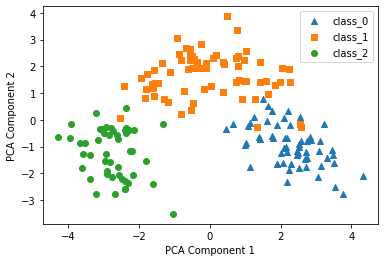

In [28]:
markers = ['^', 's', 'o'] 
for i, marker in enumerate(markers): 
    x_axis_data = df[df.target == i]['PC1']
    y_axis_data = df[df.target == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, 
                label = wine.target_names[i] )
plt.legend()
plt.xlabel('PCA Component 1'); plt.ylabel('PCA Component 2')
plt.show()

In [23]:
# 4차원은 시각화 불가능

In [2]:
from sklearn.datasets import load_breast_cancer
b = load_breast_cancer()

NameError: name 'np' is not defined